# Getting Started

As usual, starting off by bringing in some usual visualization and data tools. Going to bring in the saved spreadsheet by defining a path, then turning the dataframe to that path to bring it into memory.

In [1]:
#Import starter libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data\\HPD Shootings\\HPD Shootings.xlsx"
df = pd.read_excel(path)
df.drop('\n', axis = 1, inplace = True)
#This \n column exists in the current xlsx, completely empty.
#Dropping it for easier cleaning
df.head()

,Incident,Unnamed: 1,Unnamed: 2,Suspect,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Officer,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,DATE,INC NO.,LOCATION,SEX,RACE,AGE,INJURY,WEAPON,SEX,RACE,AGE,INJURY,ON DUTY,RESPONSE TYPE,NUM OF OFFICERS,Synopsis,
1,2020-05-29 00:00:00,71326920,7000 CULLEN BLVD,M,H,26,Wounded,Other,M,W,22,None,Y,Emergency Call,1,An officer was conducting a traffic stop and h...,NaN
2,2020-05-28 00:00:00,71270820,6300 DUMFRIES DR,M,H,18,Wounded,Firearm,M,B,35,None,Y,Traffic Stop,1,"An officer observed a traffic violation, turne...",NaN
3,2020-05-25 00:00:00,69259320,6500 CAPRIDGE DR,M,H,U,Killed,Firearm,M,H,31,None,Y,Emergency Call,2 or More,Officers were dispatched to a suicide threat w...,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,W,26,None,Y,Emergency Call,2 or More,NaN,NaN


In [3]:
df.columns

Index(['Incident', 'Unnamed: 1', 'Unnamed: 2', 'Suspect', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Officer', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
df.loc[0]

Incident                  DATE
Unnamed: 1             INC NO.
Unnamed: 2            LOCATION
Suspect                    SEX
Unnamed: 4                RACE
Unnamed: 5                 AGE
Unnamed: 6              INJURY
Unnamed: 7              WEAPON
Officer                    SEX
Unnamed: 9                RACE
Unnamed: 10                AGE
Unnamed: 11             INJURY
Unnamed: 12            ON DUTY
Unnamed: 13      RESPONSE TYPE
Unnamed: 14    NUM OF OFFICERS
Unnamed: 15           Synopsis
Unnamed: 16                   
Name: 0, dtype: object

These titles/subject headers reveal the nested structure of the spreadsheet I'm working with. It's got major sections of Incident, Suspect, and Officer; then subsections with the appropriate information contained therein. This is going to serve as the basis for which I will split the spreadsheet into 3 separate tables.

In the meantime, let's relabel these headers and drop the top row so that we can work through this table by table.

In [5]:
#Adjusts this dataframe's column names to include category data
old = list(df.columns)
actual = list(df.loc[0].ravel())
new = []
for n, label in enumerate(old):
    if 'Unnamed' not in label:
        category = label
    new.append(category + '_' + actual[n])
df.rename(dict(zip(old, new)), axis = 1, inplace = True)

#Drop the row that previously held correct labels
df.drop(0, axis = 0, inplace = True)

#Display new dataframe to check
df.head()

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
1,2020-05-29 00:00:00,71326920,7000 CULLEN BLVD,M,H,26,Wounded,Other,M,W,22,None,Y,Emergency Call,1,An officer was conducting a traffic stop and h...,NaN
2,2020-05-28 00:00:00,71270820,6300 DUMFRIES DR,M,H,18,Wounded,Firearm,M,B,35,None,Y,Traffic Stop,1,"An officer observed a traffic violation, turne...",NaN
3,2020-05-25 00:00:00,69259320,6500 CAPRIDGE DR,M,H,U,Killed,Firearm,M,H,31,None,Y,Emergency Call,2 or More,Officers were dispatched to a suicide threat w...,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,W,26,None,Y,Emergency Call,2 or More,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,W,39,None,Y,Emergency Call,2 or More,NaN,NaN


In [6]:
df.isnull().sum()

Incident_DATE              263
Incident_INC NO.           263
Incident_LOCATION          263
Suspect_SEX                163
Suspect_RACE               163
Suspect_AGE                164
Suspect_INJURY             160
Suspect_WEAPON             151
Officer_SEX                 73
Officer_RACE                73
Officer_AGE                 73
Officer_INJURY              73
Officer_ON DUTY             73
Officer_RESPONSE TYPE      659
Officer_NUM OF OFFICERS    244
Officer_Synopsis           265
Officer_                   743
dtype: int64

In [7]:
#Need to propogate Incident ID down, since right now
#It's basically just grouped up in merged cells

#Copies the list to check
copy = list(df['Incident_INC NO.'].ravel())

#Cleans it up
for index, incident in enumerate(copy):
    if np.isnan(incident) == True:
        copy[index] = copy[(index -1)]

#Preview the fix
copy

[71326920,
 71270820,
 69259320,
 69259320,
 69259320,
 64788020,
 63946620,
 63946620,
 60491720,
 54949120,
 54949120,
 52537920,
 52537920,
 52537920,
 52537920,
 52537920,
 47826020,
 44206820,
 23726420,
 10380820,
 2508920,
 4005720,
 2446820,
 2446820,
 2446820,
 2446820,
 171736319,
 171736319,
 4055820,
 4055820,
 115732919,
 115732919,
 119361419,
 120935219,
 120935219,
 143778519,
 143778519,
 108199719,
 102521519,
 102521519,
 93118919,
 82488019,
 82488019,
 82488019,
 77867119,
 77867119,
 65776819,
 46151719,
 25266619,
 25266619,
 22869919,
 13527619,
 13527619,
 12191319,
 12133719,
 12133719,
 12133719,
 12133719,
 12191319,
 3169319,
 3169319,
 1599519,
 162241918,
 150372018,
 150372018,
 149476218,
 144320018,
 135922718,
 122990318,
 122990318,
 122990318,
 123798518,
 114287818,
 95218318,
 95218318,
 93701118,
 90024918,
 79427318,
 77476418,
 71389218,
 66457618,
 20235418,
 20235418,
 20235418,
 20235418,
 20235418,
 13903618,
 13572118,
 136191017,
 1342532

In [8]:
#Apply and check the fix
df['Incident_INC NO.'] = copy

#IF the fix worked there should be zero null values, which should sum to 0
df['Incident_INC NO.'].isnull().sum() == 0

True

In [9]:
#Convert the date to datetime
df.Incident_DATE = pd.to_datetime(df['Incident_DATE'])
df.dtypes

Incident_DATE              datetime64[ns]
Incident_INC NO.                    int64
Incident_LOCATION                  object
Suspect_SEX                        object
Suspect_RACE                       object
Suspect_AGE                        object
Suspect_INJURY                     object
Suspect_WEAPON                     object
Officer_SEX                        object
Officer_RACE                       object
Officer_AGE                        object
Officer_INJURY                     object
Officer_ON DUTY                    object
Officer_RESPONSE TYPE              object
Officer_NUM OF OFFICERS            object
Officer_Synopsis                   object
Officer_                           object
dtype: object

In [10]:
#It will probably be easier to work with separate tables
incident = list(incident for incident in df.columns if 'Incident' in incident)
suspect = list(suspect for suspect in df.columns if 'Suspect' in suspect)
officer = list(officer for officer in df.columns if 'Officer' in officer)

df_s, df_o = df.copy(), df.copy()

df_s.drop(officer, inplace = True, axis = 1)
df_o.drop(suspect, inplace = True, axis = 1)

print(df_s.columns)
print(df_o.columns)

Index(['Incident_DATE', 'Incident_INC NO.', 'Incident_LOCATION', 'Suspect_SEX',
       'Suspect_RACE', 'Suspect_AGE', 'Suspect_INJURY', 'Suspect_WEAPON'],
      dtype='object')
Index(['Incident_DATE', 'Incident_INC NO.', 'Incident_LOCATION', 'Officer_SEX',
       'Officer_RACE', 'Officer_AGE', 'Officer_INJURY', 'Officer_ON DUTY',
       'Officer_RESPONSE TYPE', 'Officer_NUM OF OFFICERS', 'Officer_Synopsis',
       'Officer_ '],
      dtype='object')


# Working with the Suspect Table

Going to start here, cleaning up information that's avaialble about the suspects. Once the data in this table is cleaned and standardized, I will move on to the officer table.

In [11]:
df_s.head(10)

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
1,2020-05-29,71326920,7000 CULLEN BLVD,M,H,26,Wounded,Other
2,2020-05-28,71270820,6300 DUMFRIES DR,M,H,18,Wounded,Firearm
3,2020-05-25,69259320,6500 CAPRIDGE DR,M,H,U,Killed,Firearm
4,NaT,69259320,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,69259320,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-05-16,64788020,8600 S BRAESWOOD BLVD,M,B,38,Killed,Knife
7,2020-05-14,63946620,3800 NOAH ST,M,B,30,Killed,Other
8,NaT,63946620,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-05-08,60491720,11700 NORTH FWY OB,M,B,48,Killed,Other
10,2020-04-27,54949120,7900 LANE ST,M,H,28,Killed,Firearm


In [12]:
df_s.isnull().sum()

Incident_DATE        263
Incident_INC NO.       0
Incident_LOCATION    263
Suspect_SEX          163
Suspect_RACE         163
Suspect_AGE          164
Suspect_INJURY       160
Suspect_WEAPON       151
dtype: int64

Due to the discrepencies within the Suspect table itself, we can't just start tossing null values. We can potentially start tossing null values where there is at least the lowest common denominator - the Suspect_WEAPON column.

The other columns appear to have more data in them, so apparently some other mostly empty rows have information about suspect age, injury, and weapon types.

In [20]:
#This is going to look for what's Null in suspect_weapon, and then count the number of null values across the other rows
df_s.loc[df_s.Suspect_WEAPON.isnull()].isnull().sum()

Incident_DATE        151
Incident_INC NO.       0
Incident_LOCATION    151
Suspect_SEX          151
Suspect_RACE         151
Suspect_AGE          151
Suspect_INJURY       151
Suspect_WEAPON       151
dtype: int64

So, as we can see, the 151 null values in Suspect_weapon correspond to 151 completely empty rows. As that's the case, we can go ahead and drop these rows, as there's just no real data that can actually sustain them.

In [21]:
#Drops those null rows
drop = df_s.loc[df_s.Suspect_WEAPON.isnull()].index
df_s.drop(drop, axis = 0, inplace = True)

#Recalculates the count of null values across the df
df_s.isnull().sum()

Incident_DATE        112
Incident_INC NO.       0
Incident_LOCATION    112
Suspect_SEX           12
Suspect_RACE          12
Suspect_AGE           13
Suspect_INJURY         9
Suspect_WEAPON         0
dtype: int64

We're going to keep going with this strategy of evaluating the LCD for null values and building the dataframe out from there. The next lowest one is the Injury column.

In [28]:
#Locations with missing values in Injury column
weird = df_s.loc[df_s.Suspect_INJURY.isnull()]['Incident_INC NO.']
df_s.loc[df_s['Incident_INC NO.'].isin(weird)]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
34,2019-09-16,120935219,10700 S. Gessner,M,B,27,Killed,Firearm
35,NaT,120935219,NaN,NaN,NaN,NaN,NaN,Firearm
36,2019-11-01,143778519,16100 S POST OAK RD,M,A,32,2,Firearm
37,NaT,143778519,NaN,NaN,NaN,NaN,NaN,Firearm
212,2015-04-15,47127315,15100 Wallisville,M,B,42,Killed,None
213,NaT,47127315,NaN,NaN,NaN,NaN,NaN,None
241,2014-09-23,120847114,4830 HOLLOWAY DR,M,B,25,Wounded,Vehicle
242,NaT,120847114,NaN,NaN,NaN,NaN,NaN,Vehicle
305,2013-08-05,97994313,5725 FONDREN RD,M,H,28,Killed,Firearm
306,NaT,97994313,NaN,NaN,NaN,NaN,NaN,Firearm


What's weird here is that you can see where we have empty rows except for the Weapon column. I want to look at these indices in the dataframe to find out what is going on here.

In [24]:
df.loc[df['Incident_INC NO.'].isin(weird)]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
34,2019-09-16,120935219,10700 S. Gessner,M,B,27,Killed,Firearm,M,W,28,None,Y,Other,2 or More,A citizen flagged down HPD officers regarding ...,NaN
35,NaT,120935219,NaN,NaN,NaN,NaN,NaN,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN
36,2019-11-01,143778519,16100 S POST OAK RD,M,A,32,2,Firearm,M,W,39,None,Y,Other,2 or More,A vehicle pursuit ensued after officers attemp...,NaN
37,NaT,143778519,NaN,NaN,NaN,NaN,NaN,Firearm,M,H,33,None,Y,NaN,NaN,NaN,NaN
212,2015-04-15,47127315,15100 Wallisville,M,B,42,Killed,None,M,H,32,None,Y,NaN,NaN,HPD officers conducted a traffic stop but the ...,NaN
213,NaT,47127315,NaN,NaN,NaN,NaN,NaN,None,M,W,30,None,Y,NaN,NaN,NaN,NaN
241,2014-09-23,120847114,4830 HOLLOWAY DR,M,B,25,Wounded,Vehicle,M,W,28,None,Y,NaN,NaN,Officer responded to a wanted suspect being at...,NaN
242,NaT,120847114,NaN,NaN,NaN,NaN,NaN,Vehicle,M,W,30,None,Y,NaN,NaN,NaN,NaN
305,2013-08-05,97994313,5725 FONDREN RD,M,H,28,Killed,Firearm,M,W,47,None,Y,NaN,NaN,On duty officers responded to a call of Discha...,NaN
306,NaT,97994313,NaN,NaN,NaN,NaN,NaN,Firearm,F,H,28,None,Y,NaN,NaN,NaN,NaN


So it looks like what we're catching is an overlap with the Officer table. The officer table seems to duplicate the suspect weapon. These should be safe to drop from our Suspect table, since the real information is actually kept somewhere else.

In [30]:
#Weird is a 2D array with two columns:  the index value of the null value rows, and the associated Incident number. 
#So, we can just drop the rows by using the .index of the array.
df_s.drop(weird.index, axis = 0, inplace = True)
df_s.isnull().sum()

Incident_DATE        103
Incident_INC NO.       0
Incident_LOCATION    103
Suspect_SEX            3
Suspect_RACE           3
Suspect_AGE            4
Suspect_INJURY         0
Suspect_WEAPON         0
dtype: int64

In [31]:
df_s.loc[df['Suspect_AGE'].isnull()]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
80,2018-06-05,71389218,10898 Beechnut Street,M,U,NaN,None,Firearm
598,NaT,219790008,NaN,NaN,NaN,NaN,Wounded,Vehicle
599,NaT,219790008,NaN,NaN,NaN,NaN,Wounded,Vehicle
720,NaT,103365905,NaN,NaN,NaN,NaN,Wounded,Firearm


For Incident ID 71389218 it looks like this is just a null value because the suspect has an unknown age. We can check that with a df.lookup

In [32]:
df.loc[df['Incident_INC NO.'] == 71389218]['Officer_Synopsis'].ravel()

array(['An officer was rendering aid to a person down at a Walgreens. The officer heard several gunshots across the street and went to investigate. The officer located the suspect and ordered him to stop. The suspect then turned around quickly and began to raise his weapon toward the officer. Consequently, the officer drew his duty weapon and discharged it one time at the suspect. The suspect showed no indication of being struck and fled northbound from the location on foot. The suspect was not located. '],
      dtype=object)

Looks like the suspect was not located, which confirms the theory that they were not able to get a positive ID. This is a row we will need to keep, even if it has a missing value. Let's look at the other two incidents in this query.

In [33]:
df_o.loc[df_o['Incident_INC NO.'].isin([219790008, 103365905])]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
597,2008-02-13,219790008,2929 Renshaw St.,M,H,29,None,Y,NaN,1,The officers located a stolen vehicle and when...,NaN
598,NaT,219790008,NaN,M,H,27,None,Y,NaN,1,NaN,NaN
599,NaT,219790008,NaN,M,H,28,None,Y,NaN,1,NaN,NaN
719,2005-07-06,103365905,9305 Ronda Lane,M,B,34,None,Y,NaN,1,The officers responded to a home invasion and ...,NaN
720,NaT,103365905,NaN,M,B,33,None,Y,NaN,2 or More,NaN,NaN
721,NaT,103365905,NaN,M,B,33,None,Y,NaN,2 or More,NaN,NaN


Looks like for these two case numbers there are multiple officers invovled, and that's why we have more information on the suspect table.


In [34]:
df_o.loc[df_o['Incident_INC NO.'].isin([219790008, 103365905])]['Officer_Synopsis'].ravel()

array(['The officers located a stolen vehicle and when they tried to detain the suspect the suspect attempted to flee from the officers by ramming into the patrol cars and then by trying to run over the officers forcing them to shoot the suspect.',
       nan, nan,
       'The officers responded to a home invasion and as they entered the front of the residence they saw that there were two armed suspects and one of the suspects shot at them. The suspects then attempted to flee by going out the back door but they were confronted by officers who were set up outside. The suspects were told to drop their weapons but chose to enagge the officers forcing the officers to shoot.',
       nan, nan], dtype=object)

From the language in the synopsis, we know that there is just ONE suspect in incident 219790008. However, there are TWO suspects in 103365905.

In [35]:
#Drop the empty rows associated with 219790008
df_s.drop([598, 599], axis = 0, inplace = True)
df_s.loc[df_s['Incident_INC NO.'] == 219790008]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
597,2008-02-13,219790008,2929 Renshaw St.,F,H,29,Wounded,Vehicle


In [36]:
df_s.loc[df['Suspect_AGE'].isnull()]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
80,2018-06-05,71389218,10898 Beechnut Street,M,U,NaN,None,Firearm
720,NaT,103365905,NaN,NaN,NaN,NaN,Wounded,Firearm


Process of elimination tells us that in incident 103365905 since there were 2 suspects and 3 total entries, the empty entry can be safely removed, since the other two rows must have ID information on the suspects. We can check this real quick.

In [37]:
df.loc[df['Incident_INC NO.'] == 103365905]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
719,2005-07-06,103365905,9305 Ronda Lane,M,B,32,Wounded,Firearm,M,B,34,None,Y,NaN,1,The officers responded to a home invasion and ...,NaN
720,NaT,103365905,NaN,NaN,NaN,NaN,Wounded,Firearm,M,B,33,None,Y,NaN,2 or More,NaN,NaN
721,NaT,103365905,NaN,M,B,31,Wounded,Firearm,M,B,33,None,Y,NaN,2 or More,NaN,NaN


So we can kill index 720.

In [38]:
df_s.drop([720], axis = 0, inplace = True)
df_s.isnull().sum()

Incident_DATE        100
Incident_INC NO.       0
Incident_LOCATION    100
Suspect_SEX            0
Suspect_RACE           0
Suspect_AGE            1
Suspect_INJURY         0
Suspect_WEAPON         0
dtype: int64

In [39]:
df_s.head()

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
1,2020-05-29,71326920,7000 CULLEN BLVD,M,H,26,Wounded,Other
2,2020-05-28,71270820,6300 DUMFRIES DR,M,H,18,Wounded,Firearm
3,2020-05-25,69259320,6500 CAPRIDGE DR,M,H,U,Killed,Firearm
6,2020-05-16,64788020,8600 S BRAESWOOD BLVD,M,B,38,Killed,Knife
7,2020-05-14,63946620,3800 NOAH ST,M,B,30,Killed,Other


Remember from earlier, how we had the suspect flee on foot and we weren't able to get his age? That's the remaining unknown suspect_AGE that's empty. So, with that taken care of, we're moving forard.

# Suspects Table Continued:  Standardization

At this point now that we've taken care of the missing values, we just want to make sure that we're able to get everyone on the same page, more or less.

In [47]:
#This is going to show us the unique values in each column
for column in df_s.columns:
    if 'Suspect' in column:
        print(column, df_s[column].unique())

Suspect_SEX ['M' 'F' 'Juvenile' 'U']
Suspect_RACE ['H' 'B' 'A' 'W' 'U' 'Juvenile']
Suspect_AGE [26 18 'U' 38 30 48 28 36 34 27 37 45 43 17 32 41 60 25 24 23 35 19 59 58
 39 61 16 33 nan 6 56 54 'UNK' 21 22 'Juvenile' 42 29 46 20 49 47 40 63 55
 31 44 52 14 15 51 69 57 67 53 77]
Suspect_INJURY ['Wounded' 'Killed' 'None' 1 2 'Unknown' 'S']
Suspect_WEAPON ['Other' 'Firearm' 'Knife' 'None' 'Hands and/or Feet' 'ther' 'Unknown'
 'Scissors and screwdriver' 'Vehicle' 'Machete' 'Pellet Gun' 'Tuning fork'
 'Physical Force' 'Hammer' 'Realistic BB gun' 'Metal Pole' 'BB Gun'
 'Lumber' 'Glass Shard' 'Scissors' 'Pen' 'Toy Gun' 'Hairbrush'
 'CED Device' 'Srewdriver' 'Bow and Arrow' 'Sword' 'Screwdriver'
 'Flashlight' 'Club' 'Taser' 'Tool' 'Pipe' 'Toy Pistol' 'Stick - Said Gun']


In [48]:
df_s.loc[(df_s['Suspect_SEX'] == 'U') | (df_s['Suspect_SEX'] == 'Juvenile')]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON
110,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Wounded,Unknown
111,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Wounded,Firearm
112,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Killed,Pellet Gun
135,2016-08-27,109985316,7500 Bellaire Blvd.,Juvenile,Juvenile,Juvenile,None,None
165,2016-02-13,19345016,5420 N. Hwy 6,Juvenile,Juvenile,Juvenile,Wounded,Firearm
167,2016-02-05,15817516,7129 Lawndale,Juvenile,Juvenile,Juvenile,None,None
168,NaT,15817516,NaN,Juvenile,Juvenile,Juvenile,Wounded,Firearm
172,NaT,7896816,NaN,Juvenile,Juvenile,Juvenile,None,None
175,2015-12-25,165095615,4002 Corder,Juvenile,Juvenile,Juvenile,Wounded,None
186,2015-10-08,130282515,Protected By Law,Juvenile,Juvenile,Juvenile,Wounded,Firearm


In [49]:
df.loc[df['Incident_INC NO.'] == 51362817]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
109,2017-04-24,51362817,6902 Highway 6 N,M,B,18,None,None,M,W,31,None,Y,NaN,1,Officers observed several black males exit a v...,NaN
110,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Wounded,Unknown,M,W,57,None,Y,NaN,1,NaN,NaN
111,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Wounded,Firearm,M,W,49,None,Y,NaN,1,NaN,NaN
112,NaT,51362817,NaN,Juvenile,Juvenile,Juvenile,Killed,Pellet Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.loc[109]['Officer_Synopsis']

'Officers observed several black males exit a vehicle, run into the Jack In The Box, and try to rob it. Officers attempted to intervene and stop the robbery. During the process, shots were fired at multiple armed suspects. One suspect was killed, two injured, and another was uninjured. No officers were injured during the incident.'

Note that the data hashes out race and sex and instead replaces it with "Juvenile." Not sure if there's mandated anonymity, because other records clearly report the ages of juveniles. We can however adjust the dataset to correct SEX and RACE.

In [51]:
df_s.Suspect_SEX.value_counts()

M           511
Juvenile     40
F            25
U             6
Name: Suspect_SEX, dtype: int64

In [52]:
df.loc[df['Incident_INC NO.'] == 68384613]

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Suspect_SEX,Suspect_RACE,Suspect_AGE,Suspect_INJURY,Suspect_WEAPON,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
308,2013-06-02,68384613,16031 CLARKE SPRINGS DR,M,B,14,None,None,M,H,36,None,Y,NaN,NaN,"An HPD officer was chasing a stolen vehicle, s...",NaN
309,NaT,68384613,NaN,M,B,15,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaT,68384613,NaN,M,B,16,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,NaT,68384613,NaN,M,B,UNK,None,Firearm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_s.Suspect_AGE.value_counts()

UNK         54
Juvenile    40
26          32
28          30
21          28
23          25
18          23
24          22
29          22
32          19
22          19
19          18
20          18
30          18
27          15
25          15
37          14
17          13
36          12
33          11
34          10
35           9
38           8
31           8
39           8
42           8
54           7
44           6
49           6
41           5
46           5
47           5
48           5
16           4
43           4
45           4
51           4
40           4
52           3
60           2
69           2
56           2
55           2
58           1
59           1
57           1
61           1
63           1
67           1
77           1
53           1
15           1
14           1
U            1
6            1
Name: Suspect_AGE, dtype: int64

In [54]:
#Let's start standardizing some of our data, our NANs look fine
df_s.Suspect_SEX = df_s.Suspect_SEX.astype('category')
df_s.Suspect_RACE = df_s.Suspect_RACE.astype('category')

#Standard fixes to age column
df_s.loc[3, 'Suspect_AGE'] = 'UNK'
df_s.loc[80, 'Suspect_AGE'] = 'UNK'

#Fixes to injury column
df_s.loc[33, 'Suspect_INJURY'] = 'Unknown'
df_s.loc[36, 'Suspect_INJURY'] = 'Wounded' #Per synopsis
df_s.Suspect_INJURY = df_s.Suspect_INJURY.astype('category')

#Fixes to weapon column
df_s.loc[81, 'Suspect_WEAPON'] = 'Other' #Misspelling of Other
df_s.loc[[54,59,67], 'Suspect_WEAPON'] = 'None' #Use of Hands/Feet indicates the suspect was carrying no weapon
df_s.loc[[129, 193, 248, 249, 258, 407, 408, 412, 434, 480, 509, 611, 624,
            649, 707, 709], 'Suspect_WEAPON'] = 'None' #Replacing 'Physical Force' weapon type

#Create a deciles column for easy categorization by age
#Since PANDAS can't very well understand the mixed Age column
#Create a function to handle this assignment:
def assign_decile(x):
    decile = []
    for value in x:
        try:
            age = int(value)
            if age < 20:
                decile.append('Under 20')
            if (age >= 20) and (age < 30):
                decile.append('20 - 29')
            if (age >= 30) and (age < 40):
                decile.append('30 - 39')
            if (age >= 40) and (age < 50):
                decile.append('40 - 49')
            if (age >= 50) and (age < 60):
                decile.append('50 - 59')
            if (age >= 60) and (age < 70):
                decile.append('60 - 69')
            if (age >= 70) and (age < 80):
                decile.append('70 - 79')
            if (age >= 80) and (age < 90):
                decile.append('80 - 89')
            if (age >= 90) and (age < 1000):
                decile.append('90 - 99')
        except:
            if type(value) == str:
                if value == 'Juvenile':
                    decile.append('Juvenile')
                elif (value == 'UNK') or (value == 'U'):
                    decile.append('Unknown')
                else:
                    print(f"Unanticipated exception: {type(value), value} does not meet expected values.") 
                    break
            else:
                print(f"Unanticipated exception: {type(value), value} does not meet expected values.")      
                break
    return decile

#Use the function to populate the column
df_s['Suspect_DECILE'] = assign_decile(df_s.Suspect_AGE)
df_s.Suspect_DECILE = df_s.Suspect_DECILE.astype('category')

In [55]:
df_s.isnull().sum()

Incident_DATE        100
Incident_INC NO.       0
Incident_LOCATION    100
Suspect_SEX            0
Suspect_RACE           0
Suspect_AGE            0
Suspect_INJURY         0
Suspect_WEAPON         0
Suspect_DECILE         0
dtype: int64

In [56]:
df_s.dtypes

Incident_DATE        datetime64[ns]
Incident_INC NO.              int64
Incident_LOCATION            object
Suspect_SEX                category
Suspect_RACE               category
Suspect_AGE                  object
Suspect_INJURY             category
Suspect_WEAPON               object
Suspect_DECILE             category
dtype: object

# EDA:  Suspects Table

Now that we've standardized the suspects table and made sure that it's appropriately cleaned up, we can start to conduct rudimentary analysis of its features and values.

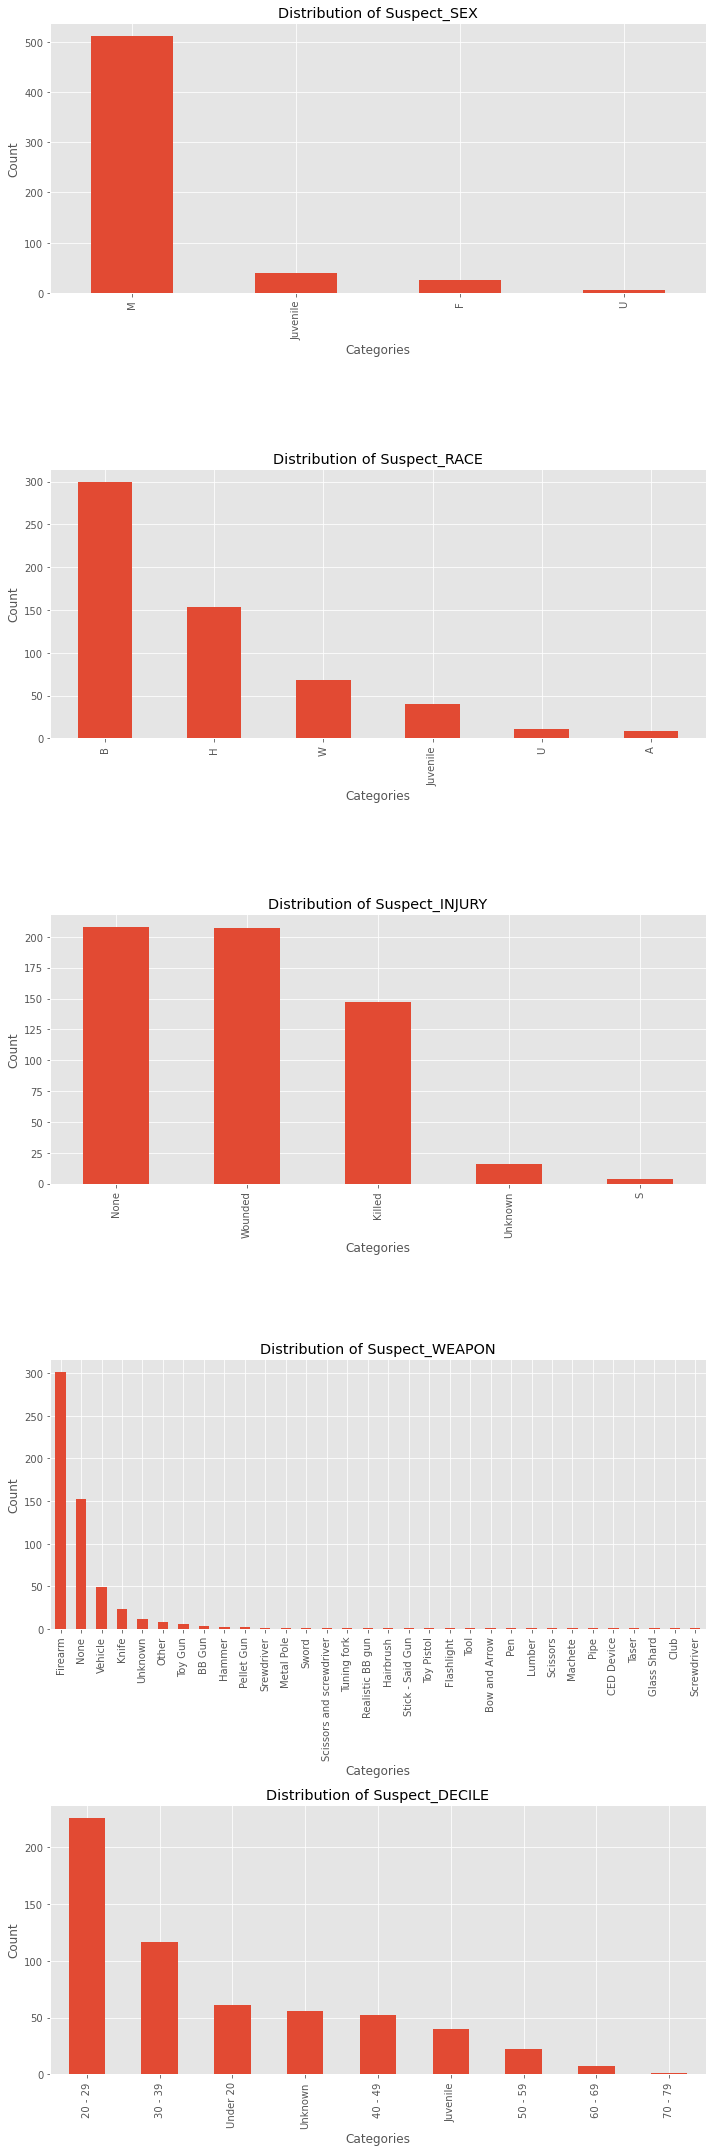

In [57]:
plt.style.use('ggplot')
fig, ax = plt.subplots(5, 1, figsize = [10,30])


demos = []
for title in df_s.columns:
    if 'Suspect' in title:
        demos.append(title)
demos.remove('Suspect_AGE')

for i, demo in enumerate(demos):
    df_s[demo].value_counts().plot.bar(ax = ax[i])
    ax[i].set_title(f'Distribution of {demo}')
    ax[i].set_xlabel('Categories')
    ax[i].set_ylabel('Count')

fig.tight_layout()

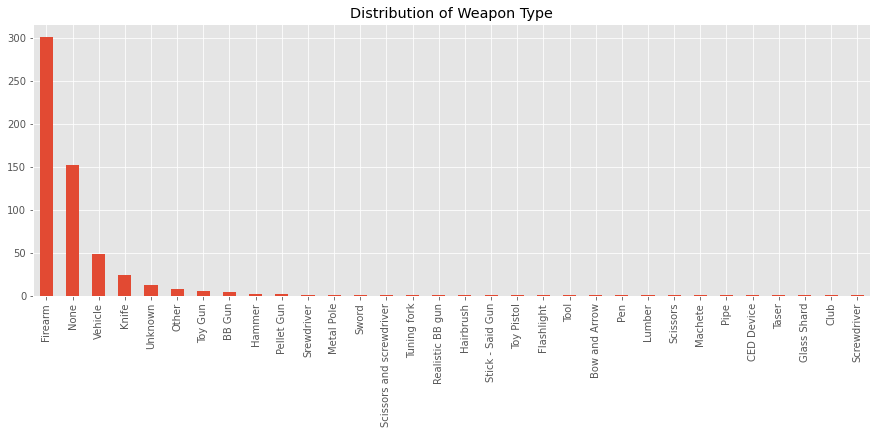

In [58]:
plt.figure(figsize = [15,5])
plt.title('Distribution of Weapon Type')
df_s.Suspect_WEAPON.value_counts().plot.bar()
plt.xticks(rotation = 90);

In [59]:
len(df_s.Suspect_WEAPON)

582

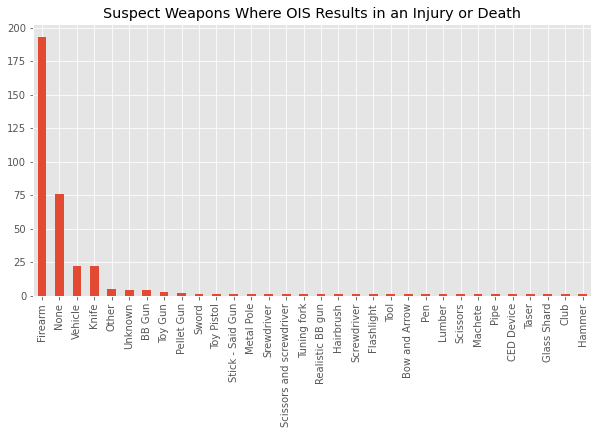

In [60]:
df_s.loc[(df_s.Suspect_INJURY == 'Killed') | (df_s.Suspect_INJURY == 'Wounded')]['Suspect_WEAPON'].value_counts().plot.bar(figsize = [10, 5], title = 'Suspect Weapons Where OIS Results in an Injury or Death')

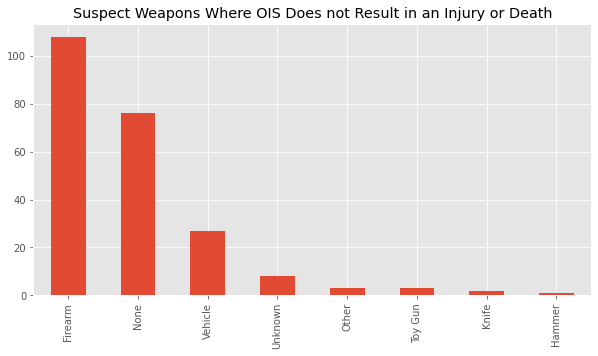

In [61]:
df_s.loc[(df_s.Suspect_INJURY != 'Killed') & (df_s.Suspect_INJURY != 'Wounded')]['Suspect_WEAPON'].value_counts().plot.bar(figsize = [10,5], title = 'Suspect Weapons Where OIS Does not Result in an Injury or Death')

In [62]:
df.loc[df['Suspect_WEAPON'] == 'Tuning fork']['Officer_Synopsis'].ravel()

array(['An officer responding to a burglary at his residence and observed the suspect walking approximately one block from his residence carrying personal items that appeared to belong to the officer. A physical altercation ensued and the suspect brandished a silver steel object and the officer, in fear of his life, fired his weapon striking the suspect.'],
      dtype=object)

In [63]:
df.loc[df['Suspect_WEAPON'] == 'Tuning fork']['Suspect_RACE']

120    B
Name: Suspect_RACE, dtype: object

In [64]:
df.loc[df['Suspect_WEAPON'] == 'Tuning fork']['Incident_DATE'].ravel()

array(['2017-02-16T00:00:00.000000000'], dtype='datetime64[ns]')

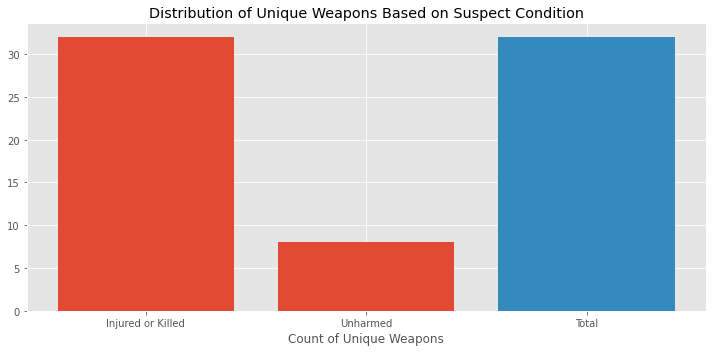

In [65]:
unique_weapon_count_inj = df_s.loc[(df_s.Suspect_INJURY == 'Killed') | (df_s.Suspect_INJURY == 'Wounded')]['Suspect_WEAPON'].nunique()
unique_weapon_count_not = df_s.loc[(df_s.Suspect_INJURY != 'Killed') & (df_s.Suspect_INJURY != 'Wounded')]['Suspect_WEAPON'].nunique()
unique_weapon_count_total = df_s.Suspect_WEAPON.nunique()

plt.figure(figsize = [10,5])
plt.bar(height = [unique_weapon_count_inj, unique_weapon_count_not],
        x = ['Injured or Killed', 'Unharmed'])
plt.bar(height = unique_weapon_count_total, x = 'Total')
plt.xlabel('Count of Unique Weapons')
plt.title('Distribution of Unique Weapons Based on Suspect Condition')
plt.tight_layout()

In [66]:
#Houston demographics per Census Bureau
Houston_demo = {'W': 24.6, 'B': 22.5, 'A': 6.9, 'H': 44.8}
sum(Houston_demo.values())

98.8

In [67]:
#Demographics of suspects by race, with Juveniles and Unknowns uncounted
norm = df_s.Suspect_RACE.count() - sum(df_s.Suspect_RACE == 'U') - sum(df_s.Suspect_RACE == 'Juvenile')
suspect_race ={}

for key in df_s.Suspect_RACE.value_counts().index:
    suspect_race[key] = 0
    n = 0
    for suspect in df_s.Suspect_RACE:
        if suspect == key:
            n += 1
    suspect_race[key] = (n/norm)*100

suspect_race.pop('U')
suspect_race.pop('Juvenile')
print(suspect_race)

{'B': 56.49717514124294, 'H': 29.001883239171374, 'W': 12.8060263653484, 'A': 1.694915254237288}


In [68]:
df_s.Suspect_RACE.value_counts().index

CategoricalIndex(['B', 'H', 'W', 'Juvenile', 'U', 'A'], categories=['A', 'B', 'H', 'Juvenile', 'U', 'W'], ordered=False, dtype='category')

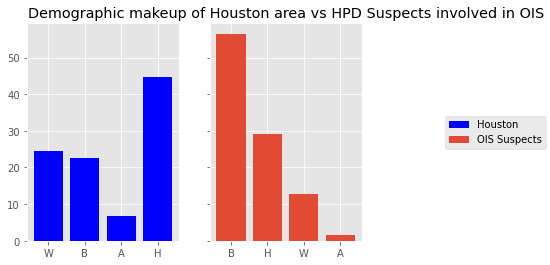

In [69]:
fig, ax = plt.subplots(1, 2, sharey = True)

plt.title('Demographic makeup of Houston area vs HPD Suspects involved in OIS')

ax[0].bar(x = list(Houston_demo.keys()), height = Houston_demo.values(), label = 'Houston', color = 'b')
ax[1].bar(x = list(suspect_race.keys()), height = suspect_race.values(), label = 'OIS Suspects')

fig.legend(loc = 'center right')

In [70]:
demos = pd.DataFrame([Houston_demo, suspect_race])
demos = pd.melt(demos)

group = []
for value in demos.value:
    if value in Houston_demo.values():
        group.append('Houston')
    elif value in suspect_race.values():
        group.append('OIS Suspects')
        
demos['set'] = group
demos.columns = ['race', 'percent', 'set']
demos.head()

,race,percent,set
0,W,24.600000,Houston
1,W,12.806026,OIS Suspects
2,B,22.500000,Houston
3,B,56.497175,OIS Suspects
4,A,6.900000,Houston


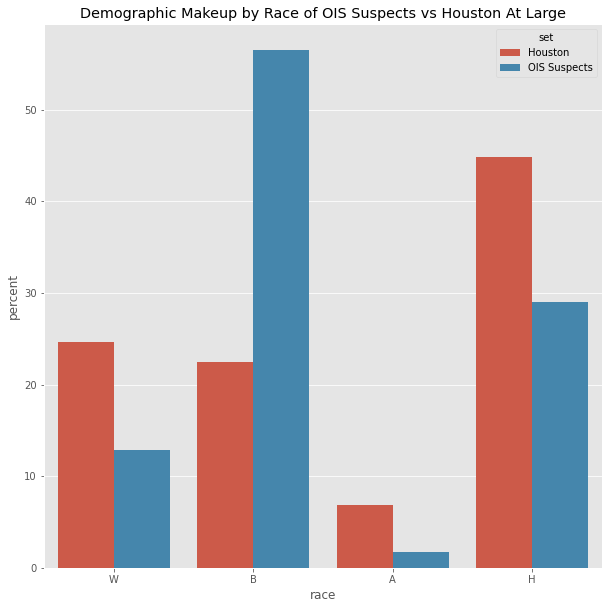

In [71]:
plt.figure(figsize = [10,10])
plt.title('Demographic Makeup by Race of OIS Suspects vs Houston At Large')
sns.barplot(data = demos, x = 'race', y = 'percent', hue = 'set')

Important to note that, even though we've wrapped up things here, we still have the INC table attached.

In [73]:
df_s.columns

Index(['Incident_DATE', 'Incident_INC NO.', 'Incident_LOCATION', 'Suspect_SEX',
       'Suspect_RACE', 'Suspect_AGE', 'Suspect_INJURY', 'Suspect_WEAPON',
       'Suspect_DECILE'],
      dtype='object')

To finalize this table, we're going to drop the LOCATION and DATE information. We will store this information, instead, in the Incident table, when it comes to that.

In [75]:
df_s.drop(['Incident_DATE', 'Incident_LOCATION'], axis = 1, inplace = True)
df_s.isnull().sum()

Incident_INC NO.    0
Suspect_SEX         0
Suspect_RACE        0
Suspect_AGE         0
Suspect_INJURY      0
Suspect_WEAPON      0
Suspect_DECILE      0
dtype: int64

In [76]:
df_s.to_csv('Suspects Table')

# Officers Table:  Cleaning up null values

Now, just going to go through the same process with the officer table. Going to start off by dropping off the Date and Location columns that we just dropped for the suspect table, now that we're confident we're going to put them into a separate table.

In [77]:
df_o.head()

,Incident_DATE,Incident_INC NO.,Incident_LOCATION,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
1,2020-05-29,71326920,7000 CULLEN BLVD,M,W,22,None,Y,Emergency Call,1,An officer was conducting a traffic stop and h...,NaN
2,2020-05-28,71270820,6300 DUMFRIES DR,M,B,35,None,Y,Traffic Stop,1,"An officer observed a traffic violation, turne...",NaN
3,2020-05-25,69259320,6500 CAPRIDGE DR,M,H,31,None,Y,Emergency Call,2 or More,Officers were dispatched to a suicide threat w...,NaN
4,NaT,69259320,NaN,M,W,26,None,Y,Emergency Call,2 or More,NaN,NaN
5,NaT,69259320,NaN,M,W,39,None,Y,Emergency Call,2 or More,NaN,NaN


In [78]:
df_o.drop(['Incident_DATE', 'Incident_LOCATION'], axis = 1, inplace = True)
df_o.head()

,Incident_INC NO.,Officer_SEX,Officer_RACE,Officer_AGE,Officer_INJURY,Officer_ON DUTY,Officer_RESPONSE TYPE,Officer_NUM OF OFFICERS,Officer_Synopsis,Officer_
1,71326920,M,W,22,None,Y,Emergency Call,1,An officer was conducting a traffic stop and h...,NaN
2,71270820,M,B,35,None,Y,Traffic Stop,1,"An officer observed a traffic violation, turne...",NaN
3,69259320,M,H,31,None,Y,Emergency Call,2 or More,Officers were dispatched to a suicide threat w...,NaN
4,69259320,M,W,26,None,Y,Emergency Call,2 or More,NaN,NaN
5,69259320,M,W,39,None,Y,Emergency Call,2 or More,NaN,NaN


In [ ]:
df_o.isnull().sum()

In [ ]:
df_o.columns[-1]

In [ ]:
df_o.drop('Officer_ ', axis = 1, inplace = True)
df_o.isnull().sum()

In [ ]:
df_o.loc[df['Officer_SEX'].isnull()]

In [ ]:
df_o.loc[df_o['Incident_INC NO.'] == 13527619]

In [ ]:
df.loc[df['Incident_INC NO.'] == 13527619]

In [ ]:
df_s.loc[df_s['Incident_INC NO.'] == 13527619]

In [ ]:
stuff = ['Officer_AGE', 'Officer_SEX', 'Officer_RACE', 'Officer_INJURY', 'Officer_ON DUTY']
indices=[]
for title in stuff:
    indices.append(list(df_o.loc[df_o[title].isnull()].index))
    
indices[0] == indices[1] == indices[2] == indices[3] == indices[4]

In [ ]:
list(indices[0])

In [ ]:
df_o.drop(indices[0], axis = 0, inplace = True)

In [ ]:
df_o.isnull().sum()

In [ ]:
df_o.head(20)

In [ ]:
df_o.loc[df_o['Officer_RESPONSE TYPE'].isnull()]

# NOTE:  Officer Response Type not included until 2018

In [ ]:
df.columns

In [ ]:
df_o.loc[df['Incident_DATE'] >= '1/1/2018']

In [ ]:
df_o.loc[df['Incident_DATE'] >= '1/1/2018'].isnull().sum()

In [ ]:
df_o['Officer_RESPONSE TYPE'].fillna('None', inplace = True)

In [ ]:
df_o.isnull().sum()

In [ ]:
df_o.loc[df_o['Incident_INC NO.'] == 69259320]

In [ ]:
zeds = df_o.loc[df_o['Officer_NUM OF OFFICERS'].isnull() == True]
z = list(zeds['Incident_INC NO.'].ravel())
df_o.loc[df_o['Incident_INC NO.'].isin(z)]

# n of Officers doesn't appear in the data until 2015
otherwise we can downfill

In [ ]:
Otherwise can downfill